In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../edgeweights_2.csv")
df

,Unnamed: 0,test_name,acc,ductive,seed,unlabeled_amount,labeled_amount
0,0,2 layer GCN with edge weights,0.872,trans,0,1000,400
1,1,2 layer GCN without edge weights,0.875,trans,0,1000,400
2,2,2 layer GCN with edge weights,0.882,trans,1,1000,400
3,3,2 layer GCN without edge weights,0.900,trans,1,1000,400
4,4,2 layer GCN with edge weights,0.881,trans,2,1000,400
5,5,2 layer GCN without edge weights,0.880,trans,2,1000,400
6,6,2 layer GCN with edge weights,0.872,trans,3,1000,400
7,7,2 layer GCN without edge weights,0.874,trans,3,1000,400
8,8,2 layer GCN with edge weights,0.862,trans,4,1000,400
9,9,2 layer GCN without edge weights,0.866,trans,4,1000,400


In [30]:
# second_df = pd.read_csv("../reuters_lowresource_moregcns.csv")
# df = pd.concat([df, second_df], axis=0)

In [31]:
from matplotlib import cm
model_count = len(df["test_name"].unique())
cmap = cm.get_cmap('rainbow')
color_mapping = {model : cmap(i/model_count) for i, model in enumerate(df["test_name"].unique())}

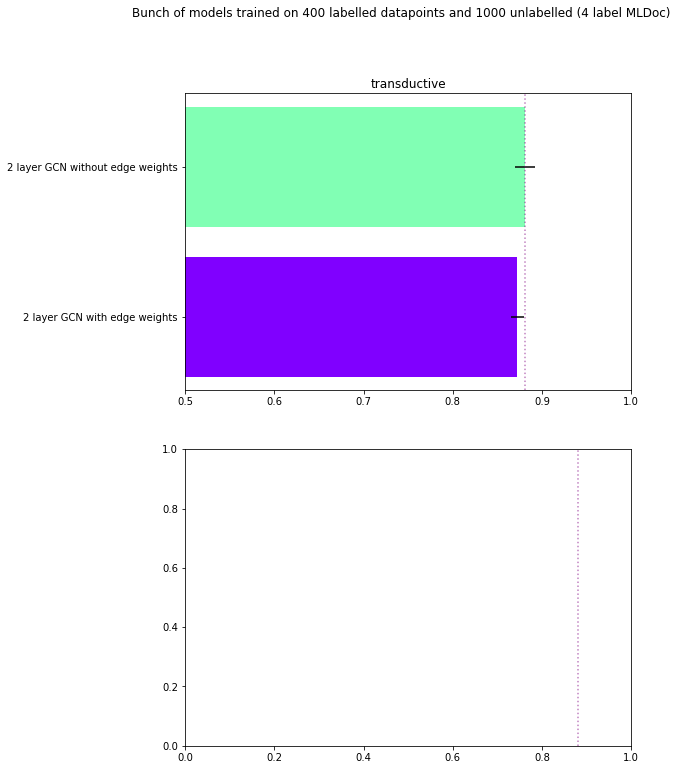

In [32]:
fig, axes = plt.subplots(2, figsize=(8, 12))

fig.suptitle("Bunch of models trained on 400 labelled datapoints and 1000 unlabelled (4 label MLDoc)")

for i, (ductive, i_df) in enumerate(df.groupby("ductive")):
    axes[i].set_title(ductive+"ductive")
    
    names = []
    means = []
    for j, (name, j_df) in enumerate(i_df.groupby("test_name")):
        mean = j_df["acc"].mean()
        std = j_df["acc"].std()
        axes[i].barh(y=j, width=mean, xerr=std, color=color_mapping[name])
        names.append(name)
        
        means.append(mean)
        
    axes[i].set_yticks(range(len(names)))
    axes[i].set_yticklabels(names)
    axes[i].set_xlim((0.5, 1))
    
    line_color = "gold" if ductive == "in" else "purple"
    axes[0].axvline(max(means), linestyle=":", alpha=0.5, color=line_color)
    axes[1].axvline(max(means), linestyle=":", alpha=0.5, color=line_color)